In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from util import calc_ground_truth_constraints, constraint_matrix_to_rules
from tasks.boston_housing import make_task4 as make_task

In [3]:
clf_a, clf_b, X, y, feature_names, categorical_features, feature_precisions = make_task()
comparer = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


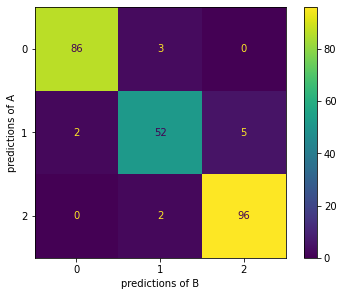

In [4]:
comparer.plot_confusion_matrix(X)

# Ground Truth

In [5]:
%%time
for label in comparer.difference_class_names:
    print(label)
    ground_truth_instance_indices, ground_truth = calc_ground_truth_constraints(comparer, feature_precisions, X, label)
    with open(f'ground_truth.{label}.pickle', 'wb') as f:
        pickle.dump((ground_truth_instance_indices, ground_truth), f)
    rules = constraint_matrix_to_rules(ground_truth, feature_names)
    for instance_idx, rule in zip(ground_truth_instance_indices, rules):
        print(f'{instance_idx}: {rule}')
    print()

(0, 1)
8: 3.0 < CRIM <= 4.0 and ZN <= 0.0 and 16.87 < INDUS <= 20.8 and 5.78 < RM <= 6.73 and AGE > 1.0 and DIS <= 4.72 and RAD > 21.4 and TAX > 599.0 and 19.18 < PTRATIO <= 20.73 and 13.9 < LSTAT <= 14.68
40: 1.0 < CRIM <= 2.0 and ZN <= 1.0 and 16.97 < INDUS <= 20.65 and 6.14 < RM <= 7.33 and AGE > 0.0 and DIS <= 6.59 and 375.0 < TAX <= 451.0 and 14.3 < PTRATIO <= 15.83 and 10.48 < LSTAT <= 11.29
238: CRIM <= 1.0 and ZN <= 0.0 and 12.37 < INDUS <= 22.1 and 4.81 < RM <= 6.51 and AGE > 0.0 and DIS <= 5.36 and RAD > 2.03 and TAX <= 303.0 and 13.36 < PTRATIO <= 17.03 and 13.14 < LSTAT <= 14.89

(0, 2)

(1, 0)
23: 0.0 < CRIM <= 1.0 and ZN <= 0.0 and 7.13 < INDUS <= 8.83 and 5.3 < RM <= 5.75 and AGE > 1.0 and DIS > 3.32 and RAD <= 5.34 and 294.0 < TAX <= 326.0 and 20.7 < PTRATIO <= 21.38 and 16.33 < LSTAT <= 16.67
156: 0.0 < CRIM <= 1.0 and ZN <= 0.0 and 7.73 < INDUS <= 9.14 and NOX <= 0.73 and 5.22 < RM <= 5.71 and AGE > 1.0 and DIS > 2.93 and RAD <= 5.93 and 288.0 < TAX <= 314.0 and 20.58